### Actor Critic method
#### 倒立摆环境 
倒立摆控制环境
Cart Pole即车杆游戏，游戏模型如下图所示。游戏里面有一个小车，上有竖着一根杆子，每次重置后的初始状态会有所不同。小车需要左右移动来保持杆子竖直，为了保证游戏继续进行需要满足以下两个条件：

杆子倾斜的角度$\theta$不能大于15°

小车移动的位置$x$需保持在一定范围（中间到两边各2.4个单位长度）

动作（action）：
- 左移（0）
- 右移（1）

状态变量（state variables）：
- $x$ ：小车在轨道上的位置（position of the cart on the track）
- $\theta$ ：杆子与竖直方向的夹角（angle of the pole with the vertical）
- $\dot{x}$ ：小车速度（cart velocity）
- $\dot{\theta}$ ：角度变化率（rate of change of the angle）

游戏奖励（reward）：

在gym的Cart Pole环境（env）里面，左移或者右移小车的action之后，env会返回一个+1的reward。其中CartPole-v0中到达200个reward之后，游戏也会结束，而CartPole-v1中则为500。最大奖励（reward）阈值可通过前面介绍的注册表进行修改。

In [7]:
import gym
import torch
from RL_algo.model_free import Actor_Critic_method as AC

#### ActorCritic

Iteration 9: 100%|██████████| 100/100 [00:40<00:00,  2.44it/s, episode=1000, return=500.000]


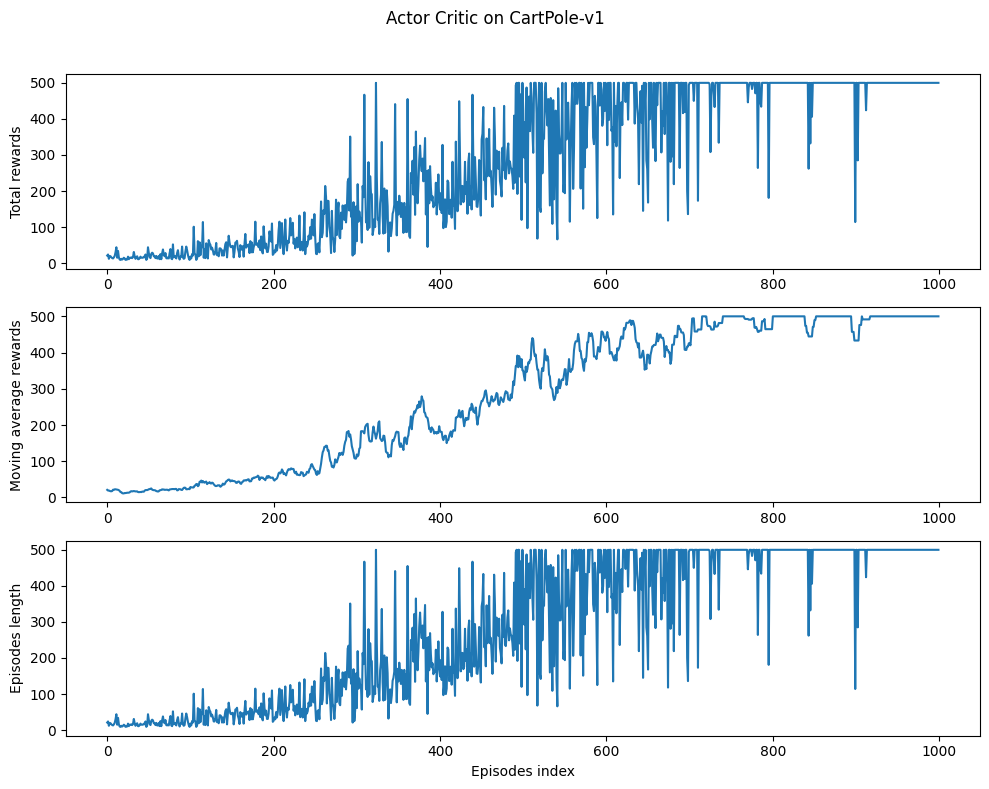

In [8]:
actor_lr = 1e-3
critic_lr = 1e-2
num_episodes = 1000
hidden_dim = [128]
gamma = 0.98
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
env = gym.make('CartPole-v1')
env.reset(seed=0)
torch.manual_seed(0)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n
agent = AC.ActorCritic(state_dim, action_dim, hidden_dim, actor_lr, critic_lr,
                    gamma, device, num_episodes, env)
agent.run_AC()

#### TRPO

e:\Anaconda\evn\wzrPytorch\lib\site-packages\gym\envs\registration.py:505: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1` with the environment ID `CartPole-v1`.
  logger.warn(
Iteration 9: 100%|██████████| 50/50 [00:08<00:00,  6.01it/s, episode=500, return=163.100]


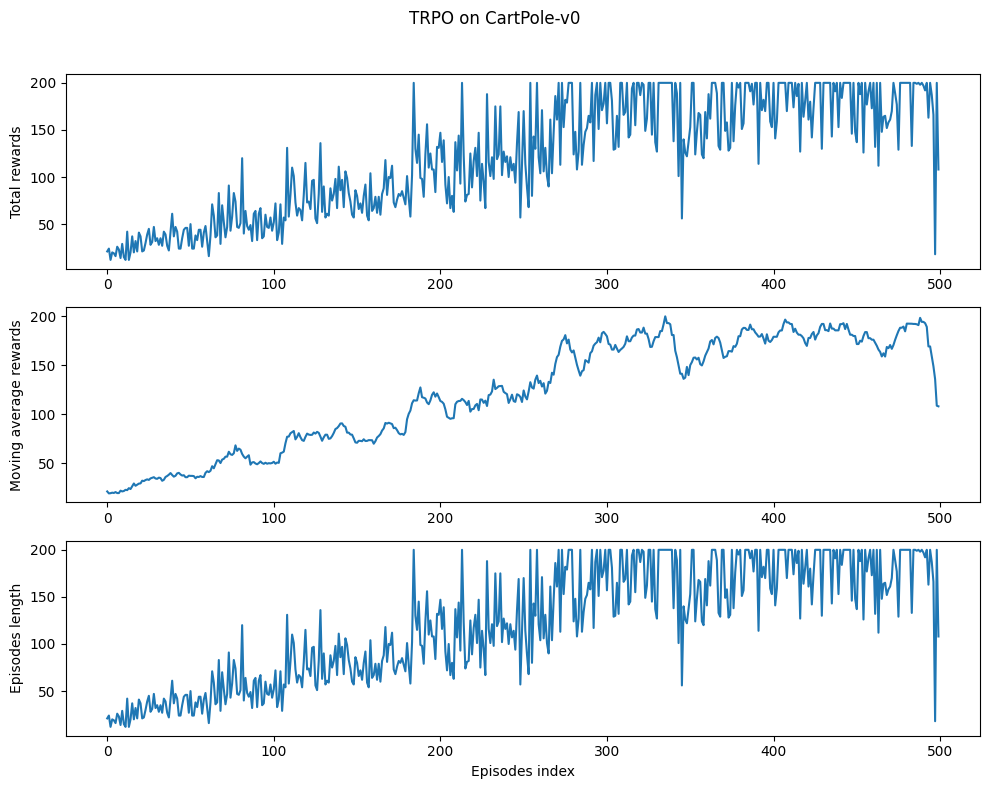

In [9]:
num_episodes = 500
hidden_dims = [128]
gamma = 0.98
lmbda = 0.95
critic_lr = 1e-2
kl_constraint = 0.0005
alpha = 0.5
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

env = gym.make('CartPole-v0')
env.reset(seed=0)
torch.manual_seed(0)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n
agent = AC.TRPO(state_dim, action_dim, hidden_dims, critic_lr,
                gamma, lmbda, kl_constraint, alpha, device, num_episodes, env)
agent.run_TRPO()

#### TRPOContinuous

Iteration 9: 100%|██████████| 50/50 [00:10<00:00,  4.86it/s, episode=500, return=-740.350]


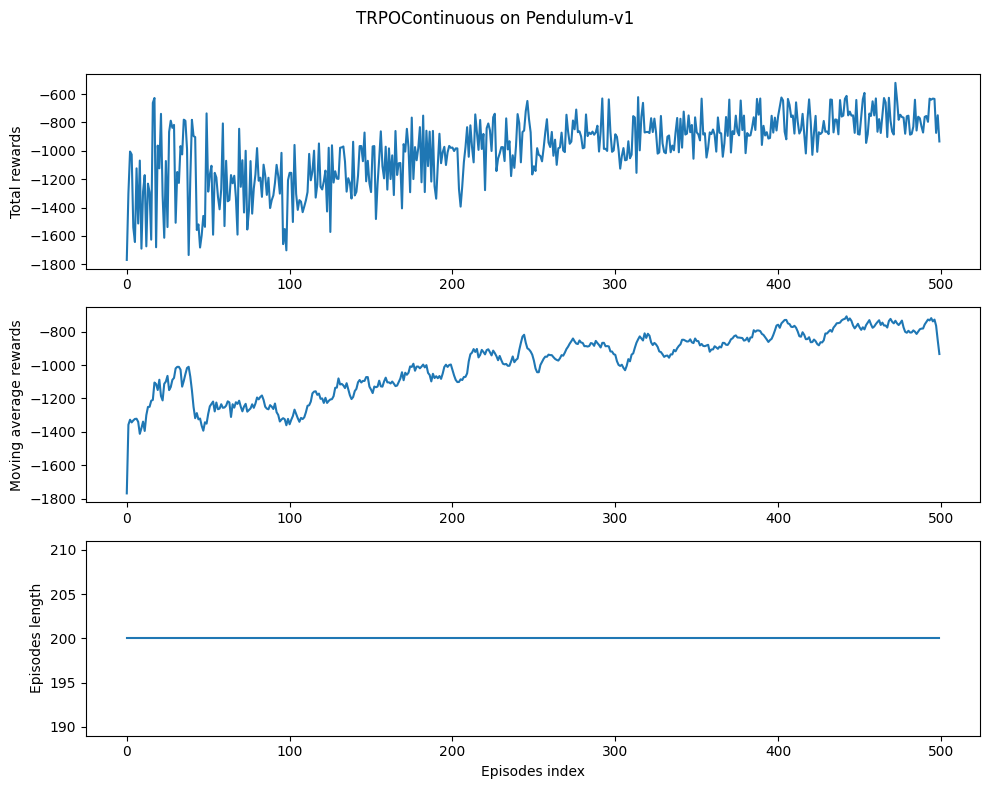

In [10]:
num_episodes = 500
hidden_dims = [128]
gamma = 0.9
lmbda = 0.9
critic_lr = 1e-2
kl_constraint = 0.0005
alpha = 0.5
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

env = gym.make('Pendulum-v1')
env.reset(seed=0)
torch.manual_seed(0)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]
agent = AC.TRPOContinuous(state_dim, action_dim, hidden_dims, critic_lr,
                gamma, lmbda, kl_constraint, alpha, device, num_episodes, env)
agent.run_TRPOcon()

#### PPO

Iteration 9: 100%|██████████| 50/50 [00:08<00:00,  5.95it/s, episode=500, return=191.000]


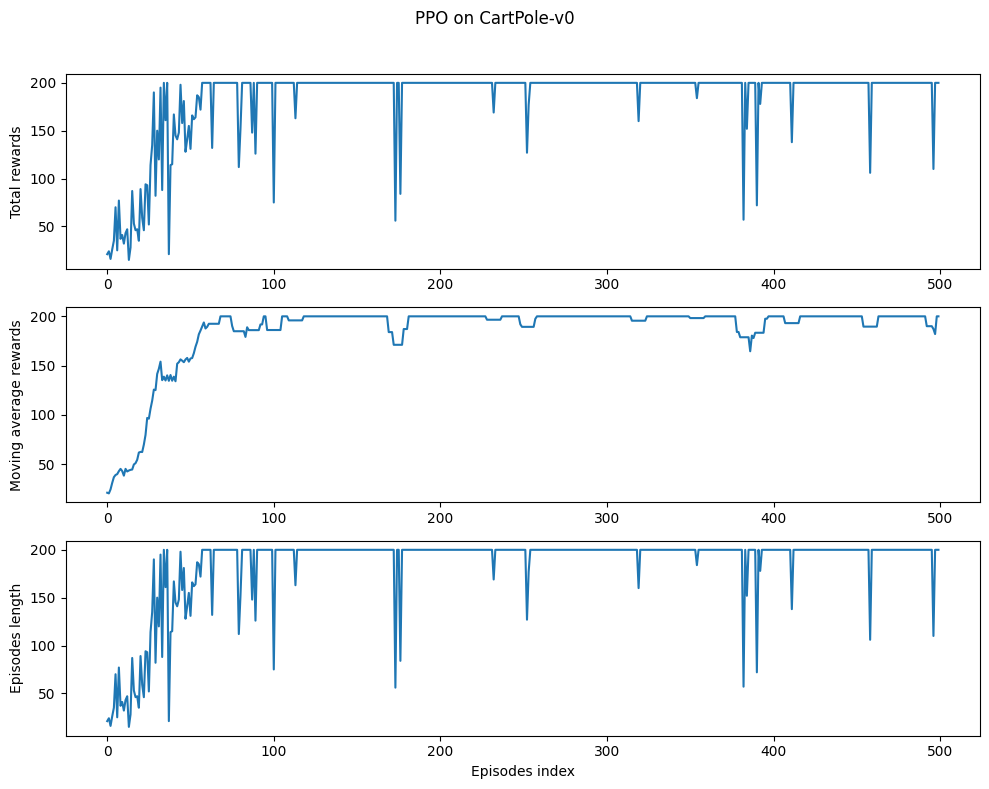

In [11]:
actor_lr = 1e-3
critic_lr = 1e-2
num_episodes = 500
hidden_dim = [128]
gamma = 0.98
lmbda = 0.95
epochs = 10
eps = 0.2
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

env = gym.make('CartPole-v0')
env.env.reset(seed=0)
torch.manual_seed(0)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n
agent = AC.PPO(state_dim, action_dim, hidden_dim, actor_lr, critic_lr, 
               lmbda, epochs, eps, gamma, device, num_episodes, env)
agent.run_PPO()

#### PPO Continuous

Iteration 9: 100%|██████████| 200/200 [00:38<00:00,  5.13it/s, episode=2000, return=-552.023]


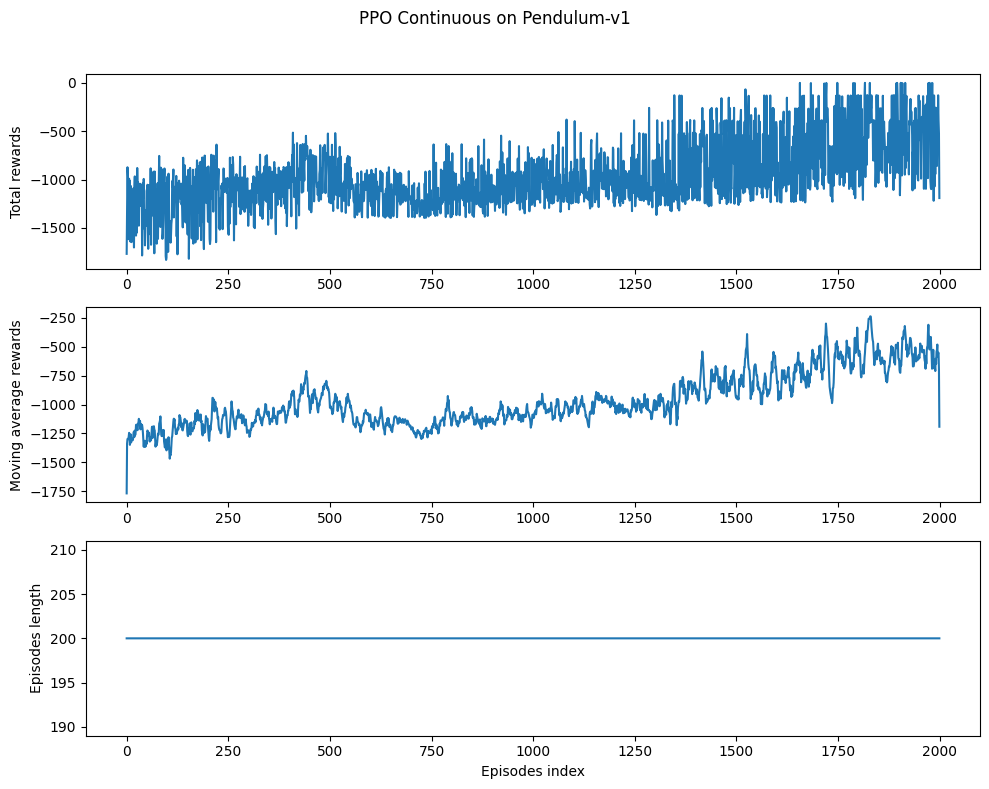

In [12]:
actor_lr = 1e-4
critic_lr = 5e-3
num_episodes = 2000
hidden_dim = [128]
gamma = 0.9
lmbda = 0.9
epochs = 10
eps = 0.2
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

env = gym.make('Pendulum-v1')
env.env.reset(seed=0)
torch.manual_seed(0)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]
agent = AC.PPOContinuous(state_dim, action_dim, hidden_dim, actor_lr, critic_lr, 
               lmbda, epochs, eps, gamma, device, num_episodes, env)
agent.run_PPOcon()